In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure

In [5]:
class Perceptron(object):
   '''Perceptron Klassificator
      Parameter
      ---------
      eta: float 
         Lernarte (zwischen 0.0 und 1.0)
      n_iter: int
         Durchläufe der Trainingsdatenmenge
      random_state: int
         Initialisierung für Zufallszahlen für allfällige Gewichte
         
      Attribute
      ---------
      w_: 1d-Array
         Gewichtungen nach Anpassungen
      errors_: list
         Anzahl der Fehlklassifikationen (Updates) pro Epoche
         
   '''
   def __init__(self, eta:float =0.01 , n_iter:int =50 , random_state:int =None):
      self.eta          = eta
      self.n_iter       = n_iter
      self.random_state = random_state
      
   def fit(self, X :np.array, y :np.array) -> object:
      '''Anpassen an die Trainingsdaten
      
         Parameter
         ---------
         X: {array-like}, shape = [n_samples, n_features]
            Trainingsvektoren, n_samples ist die Anzahl der Objekte
            und n_features ist die Anzahl der Merkmale
         y: {array-like}, shape = [n_samples]
            Zielwerte
         
         Rückgabewert
         ------------
         self: object

      '''
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
      print()
      print("Initialisierung der Gewichte: ", self.w_)
      print()
      self.errors_ = []

      for _ in range(self.n_iter):
         errors = 0
         print("=" * 30)
         print("Iteration: ", _)
         for xi, target in zip(X, y):
            print("xi: ", xi, "  /  y: ", target)
            update = self.eta * (target - self.predict(xi))
            self.w_[1:] += update * xi
            self.w_[0]  += update
            print("Gewichte: ", self.w_)
            errors += int(update != 0.0)
         self.errors_.append(errors)
      return self

   def net_input(self, X):
      '''Netzeingabe berechnen'''
      return np.dot(X, self.w_[1:]) + self.w_[0]

   def predict(self, X):
      '''Klassenbezeichnung zurückgeben'''
      return np.where(self.net_input(X) >= 0.0, 1, -1)

In [6]:
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
print('URL: ', s)
df = pd.read_csv('data/iris.data', header=None, encoding='utf-8')
df.head(10)

URL:  https://archive.ics.uci.edu\ml\machine-learning-databases\iris\iris.data


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
df.shape

(150, 5)

In [8]:
# Auswahl von Setosa und Versicolor (50-50)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)   # setosa = -1 /  versicolor = 1

In [9]:
# Auswahl von Kelch- und Blütenblattlänge
X = df.iloc[:100, [0,2]].values    # die beiden Features oder Merkamle extrahieren

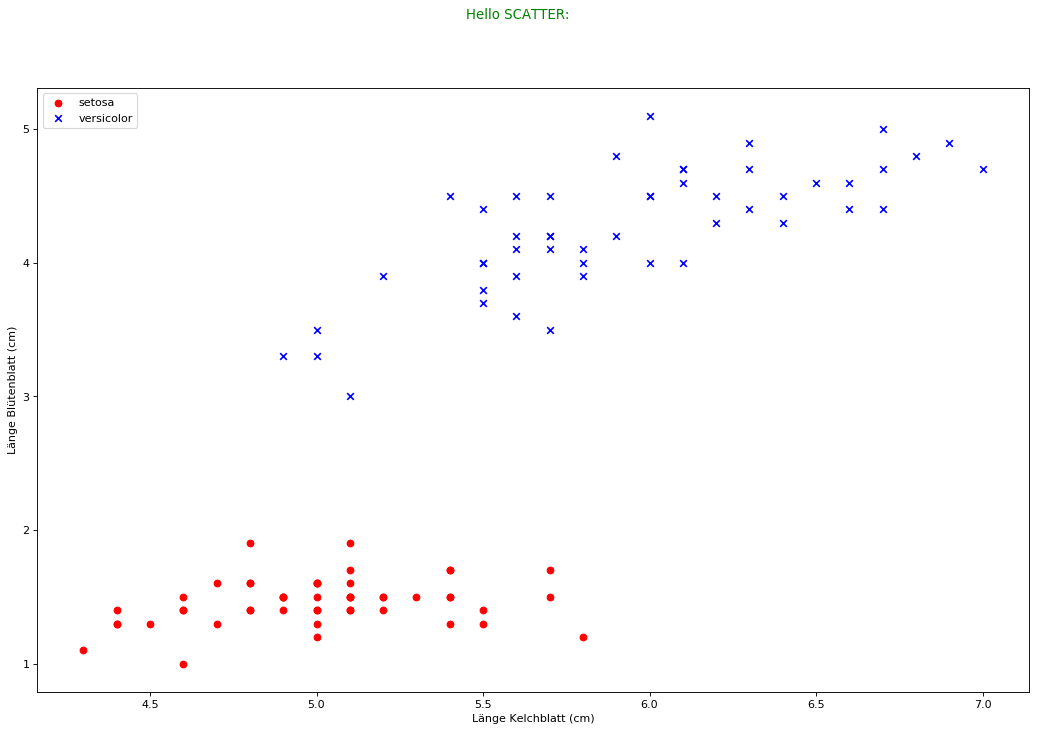

In [10]:
# Ausgbae der Diagramms
figure(figsize=(16, 10), dpi=80)
plt.scatter(X[:50, 0],  X[:50, 1], color='red',  marker='o', label='setosa')  
plt.suptitle("Hello SCATTER:", color="green")
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')   
plt.xlabel('Länge Kelchblatt (cm)')
plt.ylabel('Länge Blütenblatt (cm)')
plt.legend(loc='upper left')
plt.show()


Initialisierung der Gewichte:  [-0.01678958  0.00510405 -0.00256556]

Iteration:  0
xi:  [5.1 1.4]   /  y:  -1
Gewichte:  [-0.21678958 -1.01489595 -0.28256556]
xi:  [4.9 1.4]   /  y:  -1
Gewichte:  [-0.21678958 -1.01489595 -0.28256556]
xi:  [4.7 1.3]   /  y:  -1
Gewichte:  [-0.21678958 -1.01489595 -0.28256556]
xi:  [4.6 1.5]   /  y:  -1
Gewichte:  [-0.21678958 -1.01489595 -0.28256556]
xi:  [5.  1.4]   /  y:  -1
Gewichte:  [-0.21678958 -1.01489595 -0.28256556]
xi:  [5.4 1.7]   /  y:  -1
Gewichte:  [-0.21678958 -1.01489595 -0.28256556]
xi:  [4.6 1.4]   /  y:  -1
Gewichte:  [-0.21678958 -1.01489595 -0.28256556]
xi:  [5.  1.5]   /  y:  -1
Gewichte:  [-0.21678958 -1.01489595 -0.28256556]
xi:  [4.4 1.4]   /  y:  -1
Gewichte:  [-0.21678958 -1.01489595 -0.28256556]
xi:  [4.9 1.5]   /  y:  -1
Gewichte:  [-0.21678958 -1.01489595 -0.28256556]
xi:  [5.4 1.5]   /  y:  -1
Gewichte:  [-0.21678958 -1.01489595 -0.28256556]
xi:  [4.8 1.6]   /  y:  -1
Gewichte:  [-0.21678958 -1.01489595 -0.28256556]
xi:

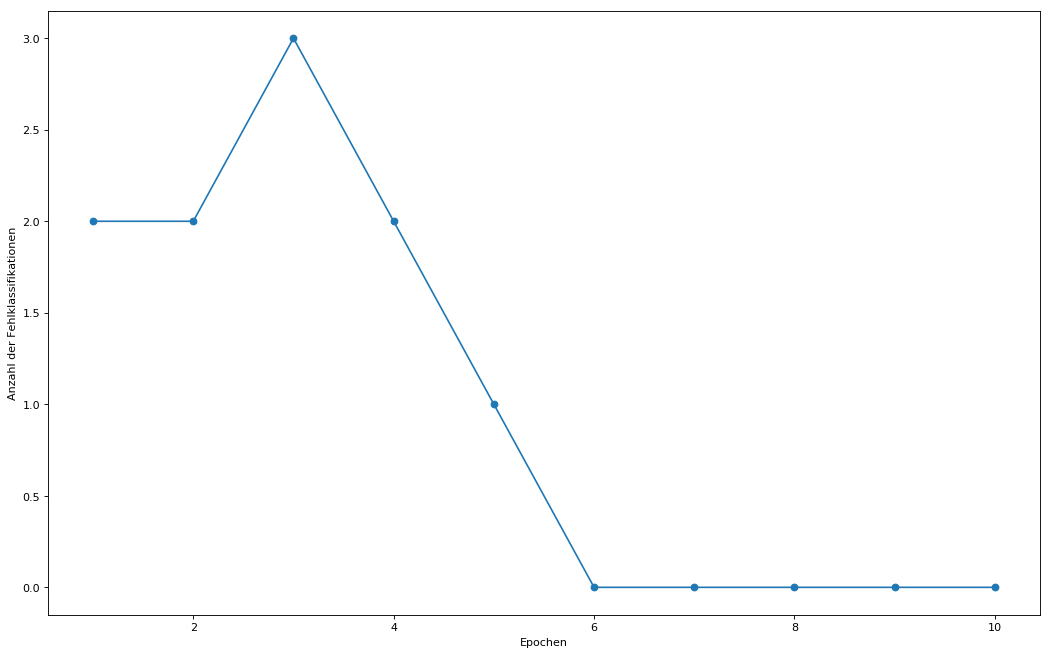

In [11]:
pnn = Perceptron(eta=0.1, n_iter=10)
pnn.fit(X, y)

figure(figsize=(16, 10), dpi=80)
plt.plot(range(1, len(pnn.errors_) + 1), pnn.errors_, marker='o')
plt.xlabel('Epochen')
plt.ylabel('Anzahl der Fehlklassifikationen')
plt.show()

In [12]:
def plot_decision_regions(X, y, classifier, resolution=.01):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('hotpink', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - .3, X[:, 0].max() + .3
    x2_min, x2_max = X[:, 1].min() - .3, X[:, 1].max() + .3

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    print("Shape xx1: ", xx1.shape, "  /  Type: ", type(xx1))
    print("Shape xx2: ", xx2.shape, "  /  Type: ", type(xx2))
    print("Flatten, für die Verwendung in PREDICT Classifier: ", xx1.ravel().shape)
    print("np.array Transpose: ", np.array([xx1.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    print("Z-shape: ", Z.shape, "  /  Type: ", type(Z))
    Z = Z.reshape(xx1.shape)
    print("Re-Shaped: ", Z.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

Shape xx1:  (470, 330)   /  Type:  <class 'numpy.ndarray'>
Shape xx2:  (470, 330)   /  Type:  <class 'numpy.ndarray'>
Flatten, für die Verwendung in PREDICT Classifier:  (155100,)
np.array Transpose:  [[4.  ]
 [4.01]
 [4.02]
 ...
 [7.27]
 [7.28]
 [7.29]]
Z-shape:  (155100,)   /  Type:  <class 'numpy.ndarray'>
Re-Shaped:  (470, 330)


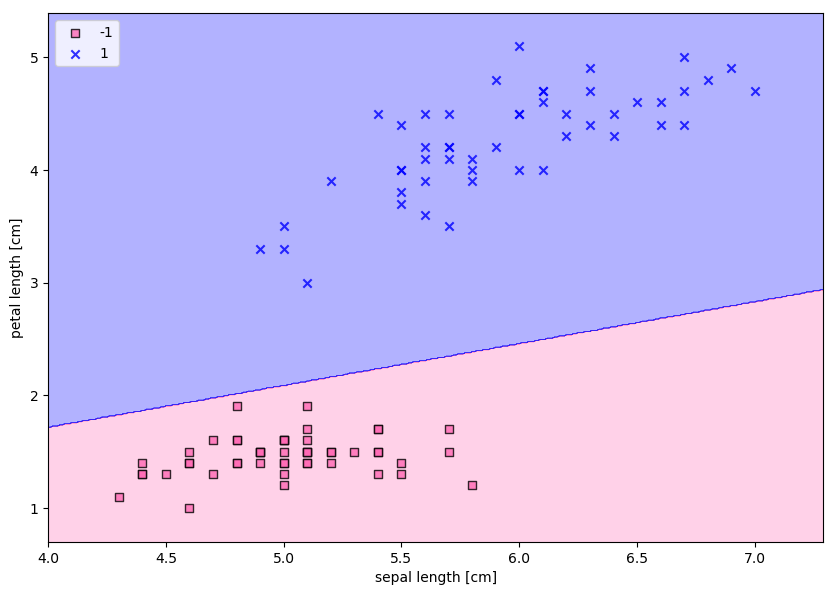

In [13]:
figure(figsize=(10, 7), dpi=100)
plot_decision_regions(X, y, classifier=pnn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()   